## Life Expectancy and GDP

The main goal of this project is to analyze if there is a relationship between a country's GDP and the life expectancy of its population.

For this project, we will analyze data on GDP and life expectancy from the World Health Organization and the World Bank from 2000 to 2015 to try and identify the relationship between the GDP and life expectancy of six countries.

We will perfom different analysis:
- Compare GDP of the six countries
- Compare life expectancy of the six countries
- Compare both variables over the years
- Compare both variables by country and how it changed over the years


However, we should keep in mind that it is not possible to generalize our conclusions as there isn enough data. There are 195 in the world (2022) and we only have available data from 6 countries.

### Import modules

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt
import math

### Load Data

In [3]:
data = pd.read_csv('all_data.csv')
data.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


### Explore Data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


In [5]:
print(data['Country'].unique())
print(data['Year'].unique())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']
[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


### Clean Data

In [6]:
data.rename(columns = {'Life expectancy at birth (years)':'LEAB'}, inplace = True)

data['Country'].replace('United States of America', 'USA', inplace = True)
print(data['Country'].unique())

['Chile' 'China' 'Germany' 'Mexico' 'USA' 'Zimbabwe']


In [7]:
#change column name

### Analysing Data

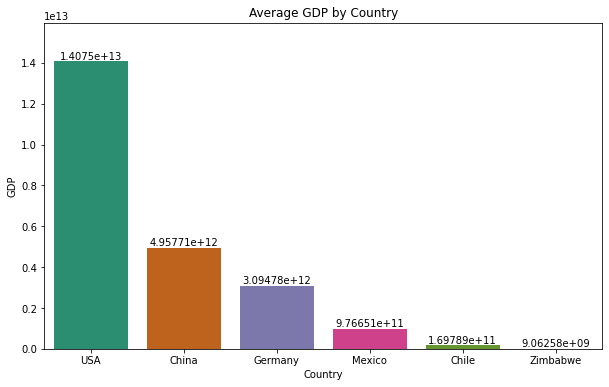

<Figure size 432x288 with 0 Axes>

In [8]:
#GPD average by country
plot_order_gdp = data.groupby('Country')['GDP'].mean().sort_values(ascending=False).index.values
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data = data, x = 'Country', y = 'GDP', order = plot_order_gdp, errwidth=0, palette = 'Dark2')
ax.bar_label(ax.containers[0])
plt.title('Average GDP by Country')
plt.show()
plt.clf()

From this plot, we could say that countries with bigger average GDP are located in the northern hemisphere. 

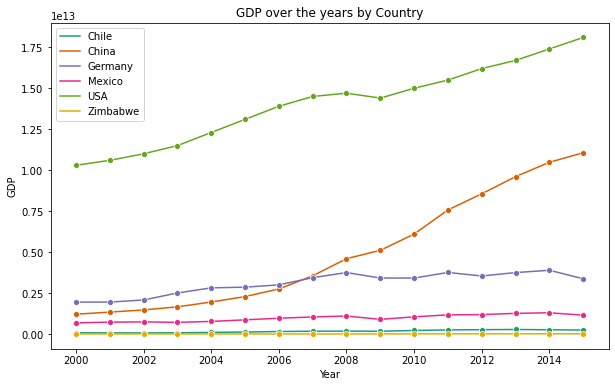

<Figure size 432x288 with 0 Axes>

In [9]:
#GPD evolution over the years by country
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data = data, x = 'Year', y = 'GDP', hue = 'Country', palette = 'Dark2', marker = 'o')
plt.title('GDP over the years by Country')
plt.legend(loc ='upper left')
plt.show()
plt.clf()

During this 15 years, only 2 countries have clearly increased their average GDP over time, USA and China. The other four countries, Germany, Mexico, Chile and Zimbabwe have had almost the same average GDP over this period. 

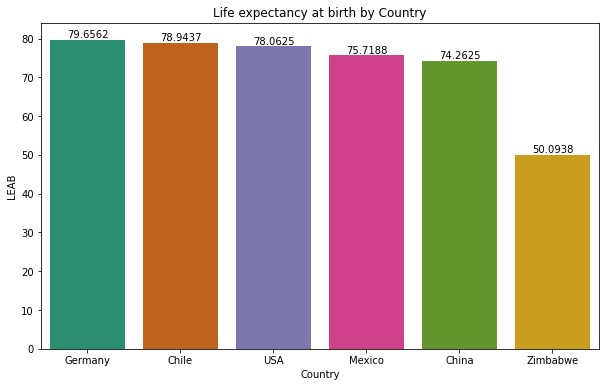

<Figure size 432x288 with 0 Axes>

In [10]:
#Life expectancy average by country
plot_order_leab = data.groupby('Country')['LEAB'].mean().sort_values(ascending=False).index.values
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data = data, x = 'Country', y = 'LEAB', order = plot_order_leab, errwidth=0, palette = 'Dark2')
ax.bar_label(ax.containers[0])
plt.title('Life expectancy at birth by Country')
plt.show()
plt.clf()

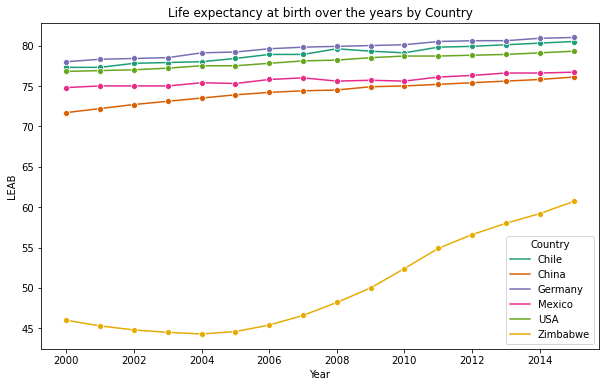

<Figure size 432x288 with 0 Axes>

In [12]:
#LEAB evolution over the years by country
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data = data, x = 'Year', y = 'LEAB', hue = 'Country', palette = 'Dark2', marker = 'o')
plt.title('Life expectancy at birth over the years by Country')
plt.show()
plt.clf()

Life expectancy has increase in every country over the past 15 years, however, we can see the biggest increase in Zimbabwe, where life expectancy at birth was 45 years old in 2000 and reached 60 years old in 2015. 

Surprisingly, Chile which was in the 4th position regarding GDP, holds the 2nd position in both life expectancy graphs, seeing a bigger difference over the year with USA, country holding the 3rd position. 

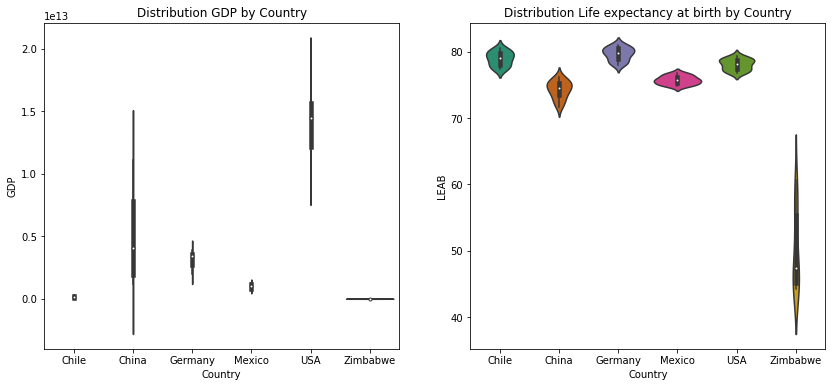

<Figure size 432x288 with 0 Axes>

In [19]:
#distributions by country
fig = plt.figure(figsize=(14, 6))
sns.set_palette('Dark2')
ax1 = plt.subplot(1, 2, 1)
sns.violinplot(data = data, x = 'Country', y = 'GDP')
plt.title('Distribution GDP by Country')

ax2 = plt.subplot(1, 2, 2)
sns.violinplot(data = data, x = 'Country', y = 'LEAB')
plt.title('Distribution Life expectancy at birth by Country')

plt.show()
plt.clf()

Analyzing this 6 countries, we could not confirm there is a correlation between GDP and Life expectancy at birth as the countries with bigger GDP are not the countries with longer life expectancies. 

To see a more detail analysis of every country, we could create a chart for each one by year.

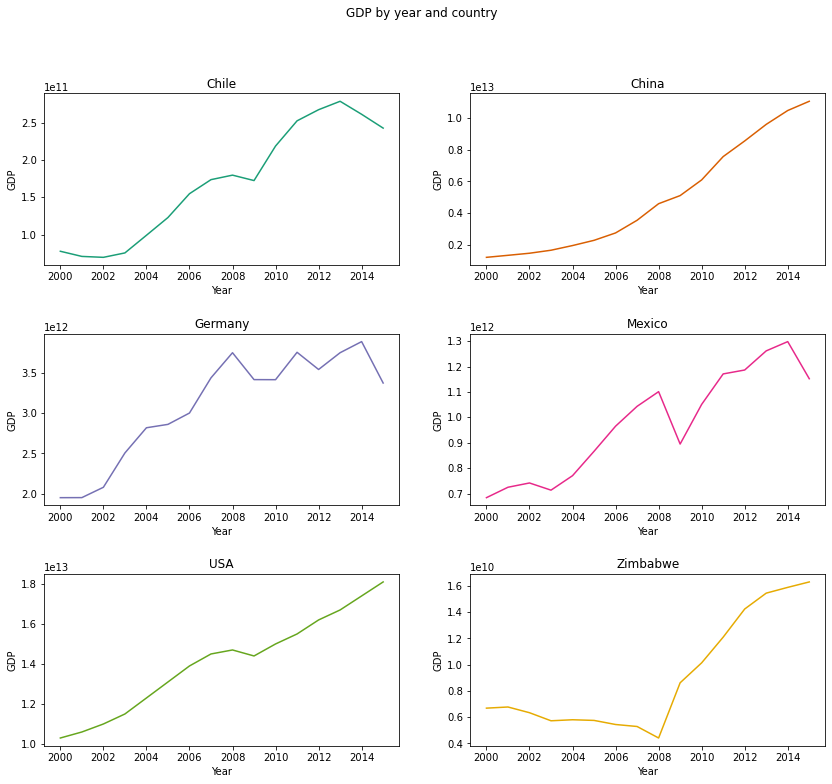

<Figure size 432x288 with 0 Axes>

In [51]:
fig = plt.figure(figsize=(14, 12))

ax1 = plt.subplot(3, 2, 1)
sns.lineplot(data = data[data['Country'] == 'Chile'], x = 'Year', y = 'GDP', color = '#1b9e77')
plt.title('Chile')

ax2 = plt.subplot(3, 2, 2)
sns.lineplot(data = data[data['Country'] == 'China'], x = 'Year', y = 'GDP', color = '#d95f02')
plt.title('China')

ax3 = plt.subplot(3, 2, 3)
sns.lineplot(data = data[data['Country'] == 'Germany'], x = 'Year', y = 'GDP', color = '#7570b3')
plt.title('Germany')

ax4 = plt.subplot(3, 2, 4)
sns.lineplot(data = data[data['Country'] == 'Mexico'], x = 'Year', y = 'GDP', color = '#e7298a')
plt.title('Mexico')

ax5 = plt.subplot(3, 2, 5)
sns.lineplot(data = data[data['Country'] == 'USA'], x = 'Year', y = 'GDP', color = '#66a61e')
plt.title('USA')

ax6 = plt.subplot(3, 2, 6)
sns.lineplot(data = data[data['Country'] == 'Zimbabwe'], x = 'Year', y = 'GDP', color = '#e6ab02')
plt.title('Zimbabwe')

plt.subplots_adjust(hspace=0.4)
plt.suptitle('GDP by year and country')
plt.show()
plt.clf()

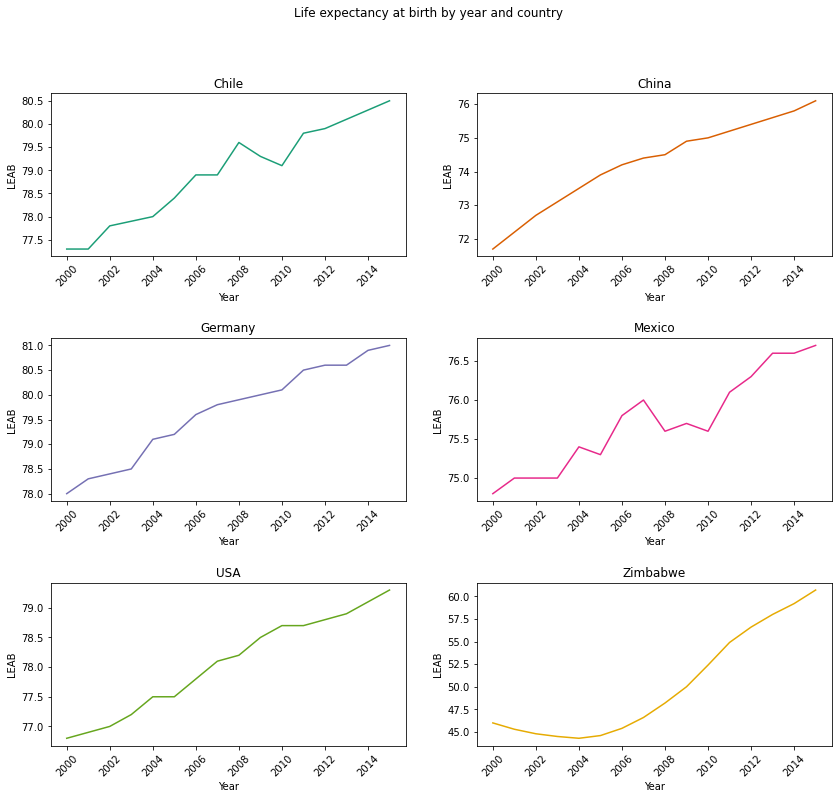

<Figure size 432x288 with 0 Axes>

In [53]:
fig = plt.figure(figsize=(14, 12))
plt.xticks(rotation = 45)

ax1 = plt.subplot(3, 2, 1)
sns.lineplot(data = data[data['Country'] == 'Chile'], x = 'Year', y = 'LEAB', color = '#1b9e77')
plt.title('Chile')
plt.xticks(rotation = 45)


ax2 = plt.subplot(3, 2, 2)
sns.lineplot(data = data[data['Country'] == 'China'], x = 'Year', y = 'LEAB', color = '#d95f02')
plt.title('China')
plt.xticks(rotation = 45)

ax3 = plt.subplot(3, 2, 3)
sns.lineplot(data = data[data['Country'] == 'Germany'], x = 'Year', y = 'LEAB', color = '#7570b3')
plt.title('Germany')
plt.xticks(rotation = 45)

ax4 = plt.subplot(3, 2, 4)
sns.lineplot(data = data[data['Country'] == 'Mexico'], x = 'Year', y = 'LEAB', color = '#e7298a')
plt.title('Mexico')
plt.xticks(rotation = 45)

ax5 = plt.subplot(3, 2, 5)
sns.lineplot(data = data[data['Country'] == 'USA'], x = 'Year', y = 'LEAB', color = '#66a61e')
plt.title('USA')
plt.xticks(rotation = 45)

ax6 = plt.subplot(3, 2, 6)
sns.lineplot(data = data[data['Country'] == 'Zimbabwe'], x = 'Year', y = 'LEAB', color = '#e6ab02')
plt.title('Zimbabwe')
plt.xticks(rotation = 45)

plt.subplots_adjust(hspace=0.5)
plt.suptitle('Life expectancy at birth by year and country')
plt.show()
plt.clf()